## 나이브 베이즈 분류(Navie Bayes Classfication)

https://parkeunsang.github.io/blog/datascience/2021/04/22/NB.html

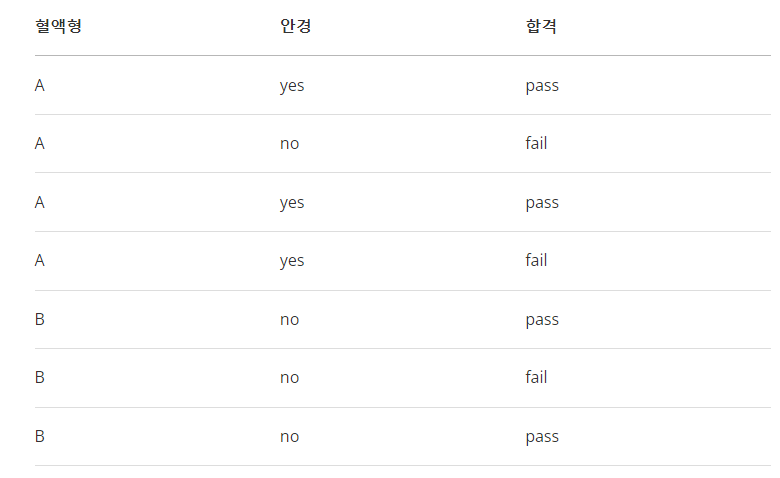

    - 위 테이블에서 혈액형이 'A'형이면서, '안경'쓴 사람이 합격할 확률?

**`P(pass|혈액형=A, 안경=yes)`**


    - 혈액형이 A형이고 안경을 쓴 사람은 3명, 그 중 2명이 합격 했으므로 2/3
    그러나, 혈액형이 B이고 안경을 쓴 사람의 경우는 관측되지 않아서 예측을 할 수 없음
    => '각각의 조건을 따로 분리' 하여 예측할 수 있음
    
    : 혈액형이 B인 사람은 2/3이 합격, 안경을 쓴 사람도 2/3이 합격했으므로
    혈액형이 B이고 안경을 썼으면 합격할 확률이 50%보다 높을 것이다. 
    라는 것이 '나이브 베이즈의 가정'


    P(pass|혈액형=B, 안경=yes) ? 
    
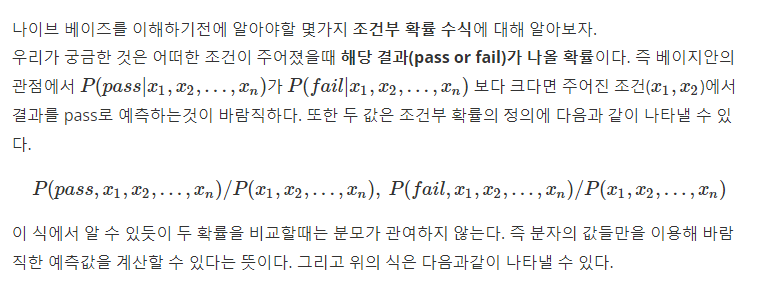

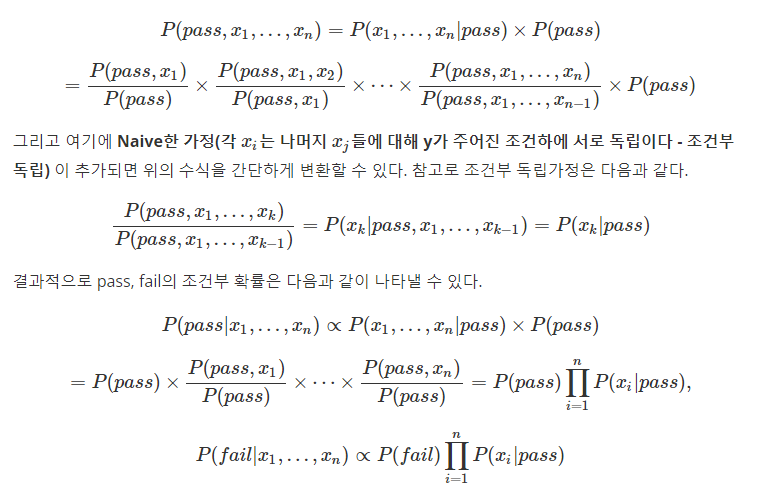
 
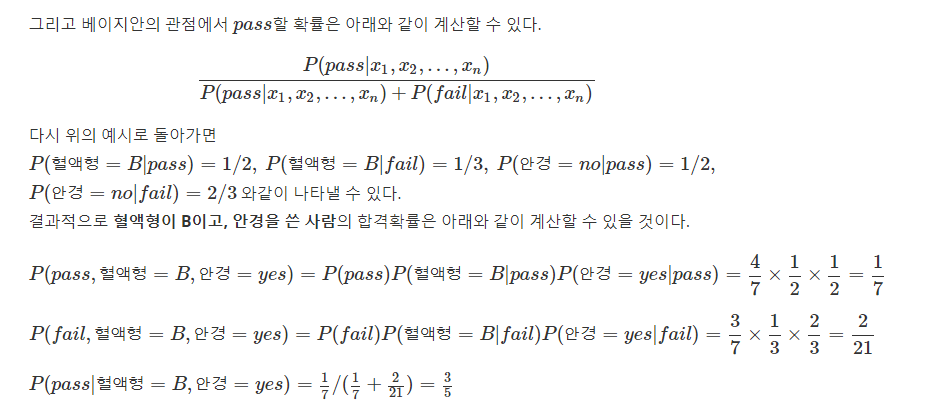

In [1]:
import pandas as pd
import numpy as np

## `Train`

In [4]:
# blood_type = ['A','B','AB','O']
# glassese_type= [0,1]
# grade = ['A','B','C','D','F']

bloods= ['A','A','B','B','B','AB','AB','O']
glasses = [0,1,0,0,1,1,0,1]
passes = [0,1,1,1,0,0,1,1]

df = pd.DataFrame({'bloods' : bloods,
                 'glasses' : glasses,
                 'pass' : passes})

display(df)

,bloods,glasses,pass
0,A,0,0
1,A,1,1
2,B,0,1
3,B,0,1
4,B,1,0
5,AB,1,0
6,AB,0,1
7,O,1,1


In [6]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

print(X.head(2))
print(y.head(2))

  bloods  glasses
0      A        0
1      A        1
0    0
1    1
Name: pass, dtype: int64


In [24]:
def get_ratio(df, cx, cy):
    df = df.copy()
    df['count'] = 1
    pivot = pd.pivot_table(df, index=cx, columns=cy, values='count', aggfunc=np.sum)
    pivot['sum'] = pivot.sum(axis=1)
    pivot = pivot.apply(lambda x: x[:-1]/x['sum'] , axis=1)
    pivot = pivot.fillna(0)
    return pivot.to_dict()

In [13]:
DF_test = DF.copy()
DF_test['count']=1
DF_test

,bloods,glasses,pass,count
0,A,0,0,1
1,A,1,1,1
2,B,0,1,1
3,B,0,1,1
4,B,1,0,1
5,AB,1,0,1
6,AB,0,1,1
7,O,1,1,1


In [17]:
p1 = pd.pivot_table(DF_test, index='bloods', columns='pass', values='count', aggfunc=np.sum)
p1

pass,0,1
bloods,,
A,1.0,1.0
AB,1.0,1.0
B,1.0,2.0
O,NaN,1.0


In [18]:
p1['sum'] = p1.sum(axis=1)
display(p1)

pass,0,1,sum
bloods,,,
A,1.0,1.0,2.0
AB,1.0,1.0,2.0
B,1.0,2.0,3.0
O,NaN,1.0,1.0


In [22]:
p1 = p1.apply(lambda x:x[:-1]/x['sum'], axis=1)
p1

pass,0,1
bloods,,
A,0.500000,0.500000
AB,0.500000,0.500000
B,0.333333,0.666667
O,NaN,1.000000


In [23]:
p1 = p1.fillna(0)
p1

pass,0,1
bloods,,
A,0.500000,0.500000
AB,0.500000,0.500000
B,0.333333,0.666667
O,0.000000,1.000000


In [25]:
p1.to_dict()

{0: {'A': 0.5, 'AB': 0.5, 'B': 0.3333333333333333, 'O': 0.0},
 1: {'A': 0.5, 'AB': 0.5, 'B': 0.6666666666666666, 'O': 1.0}}

In [16]:
pd.pivot_table(DF_test, index='glasses', columns='pass', values='count', aggfunc=np.sum)

pass,0,1
glasses,,
0,1,3
1,2,2


In [10]:
DF = pd.concat([X,y], axis=1)
col_x = DF.columns[:-1]
col_y = DF.columns[-1]

print(col_x, col_y)

Index(['bloods', 'glasses'], dtype='object') pass


In [28]:
param = {}

for cx in col_x:
    param[cx] = get_ratio(DF, cx, col_y)
    
param

{'bloods': {0: {'A': 0.5, 'AB': 0.5, 'B': 0.3333333333333333, 'O': 0.0},
  1: {'A': 0.5, 'AB': 0.5, 'B': 0.6666666666666666, 'O': 1.0}},
 'glasses': {0: {0: 0.25, 1: 0.5}, 1: {0: 0.75, 1: 0.5}}}

In [29]:
y_ratio = {}
for y_val in y.unique():
    y_ratio[y_val] = np.mean(DF[col_y]==y_val)

print(y_ratio)

{0: 0.375, 1: 0.625}


In [31]:
param['y'] = y_ratio

param

{'bloods': {0: {'A': 0.5, 'AB': 0.5, 'B': 0.3333333333333333, 'O': 0.0},
  1: {'A': 0.5, 'AB': 0.5, 'B': 0.6666666666666666, 'O': 1.0}},
 'glasses': {0: {0: 0.25, 1: 0.5}, 1: {0: 0.75, 1: 0.5}},
 'y': {0: 0.375, 1: 0.625}}

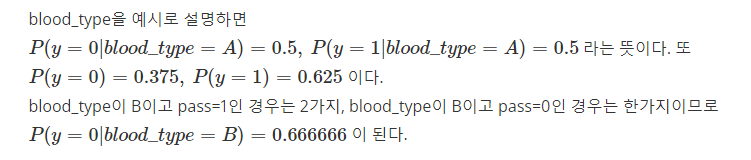

## `Test`

In [34]:
X_test = pd.DataFrame({'bloods' : ['A','B','O'],
                      'glasses' : [0,1,0]})

X_test

,bloods,glasses
0,A,0
1,B,1
2,O,0


In [38]:
col_x = X_test.columns
y_pred = []

for i in range(len(X_test)):
    row = X_test.iloc[i]
    print(f"row -> {row}")
    probs = []
    
    for y_val in y.unique():
        prob = param['y'][y_val]
        for i in range(len(col_x)):
            prob *= param[col_x[0]][y_val][row[0]]
            
        probs.append(prob)
    y_pred.append(probs)
    
y_pred = pd.DataFrame(y_pred)
y_pred['sum'] = y_pred.sum(axis=1)
y_pred = y_pred.apply(lambda x:x[-1]/x['sum'], axis=1)
y_pred.columns = y.unique()

X_test
    
    

row -> bloods     A
glasses    0
Name: 0, dtype: object
row -> bloods     B
glasses    1
Name: 1, dtype: object
row -> bloods     O
glasses    0
Name: 2, dtype: object


KeyError: -1

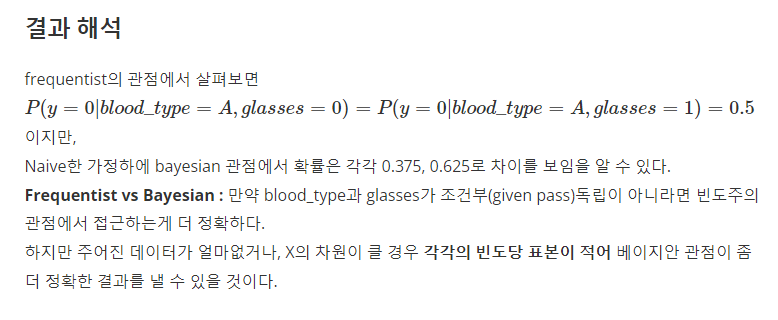